In [3]:
from google.colab import drive

drive.mount('/content/drive')
import pandas as pd
import seaborn as sns

data_ = pd.read_csv('/content/drive/MyDrive/BDA/customers.csv', encoding = "ISO-8859-1")

data=data_.copy()

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

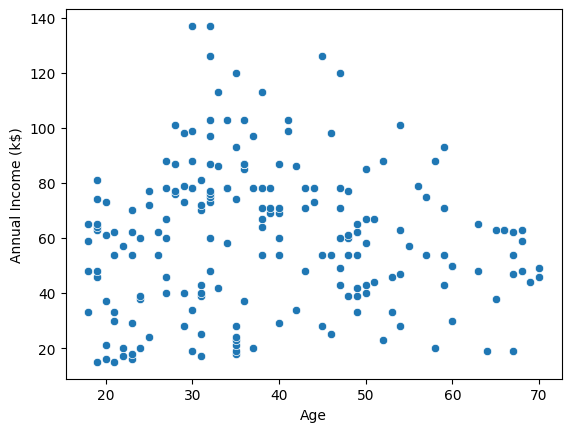

In [8]:
#create scatterplot for Age vs Annual Income
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

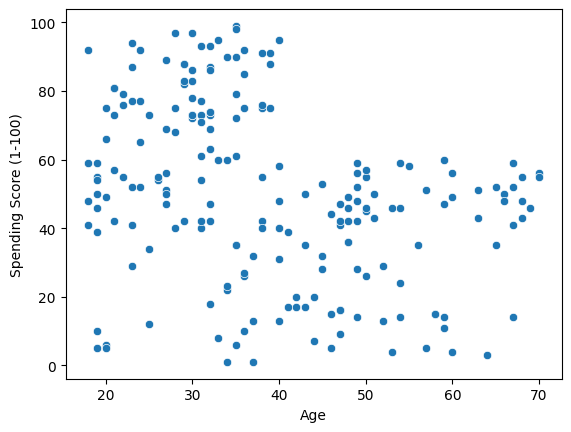

In [9]:
#create scatterplot for Age vs Spending score
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

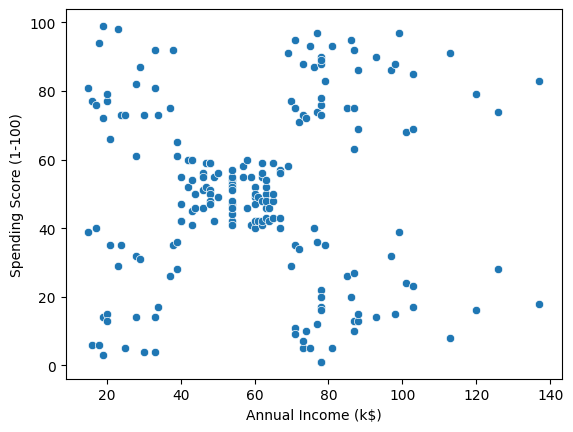

In [10]:
#create scatterplot for Annual income vs Spending score
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')


Using K-Means Method to cluster data points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

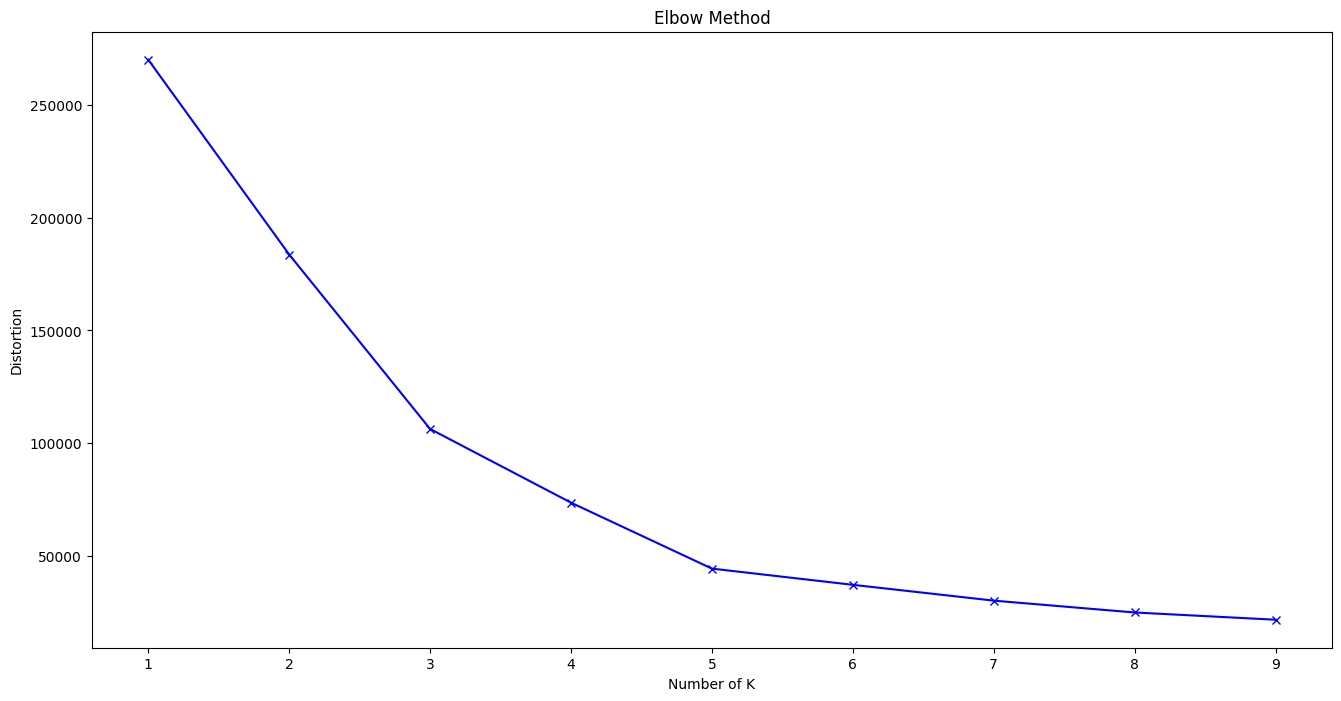

In [5]:
CRED = '\033[91m'
CEND = '\033[0m'

#Using the Elbow method to determine the optimal number of clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

#funtion to plot elbow method
def plot_elbow(x,y):
    if len(y)!=0:

        plt.figure(figsize=(16,8))
        plt.plot(K, dist, 'bx-')
        plt.xlabel('Number of K')
        plt.ylabel('Distortion')
        plt.title('Elbow Method')
        plt.show()
    else:
        raise NotImplementedError("Oops! There is some error, implement the elbow method correctly!")

#Choosing a subset to apply the K-Means method to
data_subset_5 = data[['Annual Income (k$)', 'Spending Score (1-100)']]

#Applying the Elbow method
dist = []
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(data_subset_5)
    dist.append(model.inertia_)

#Plot of the Elbow method
try:
    plot_elbow(K, dist)
except NotImplementedError as e:
    print(CRED + "TODO: " + str(e) + CEND)

**From the elbow plot, at k = 5, the distortion seem to have saturated and does not reduce sharply. Thus, k=5 is the best k for the clustering.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


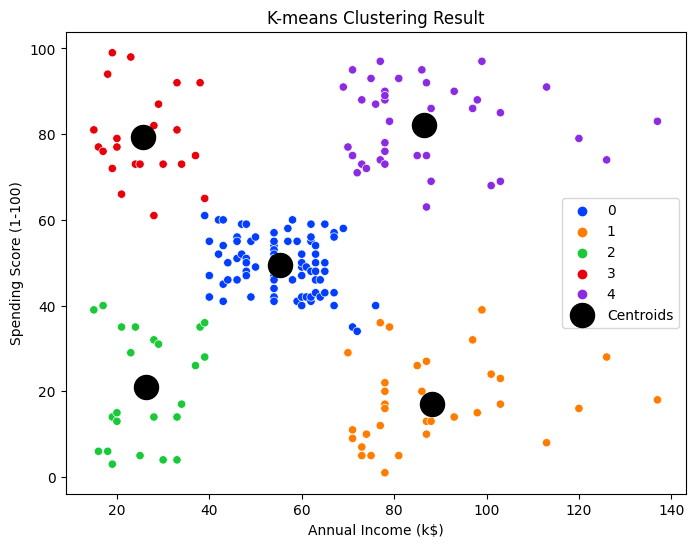

In [6]:
kmeans = KMeans(n_clusters=5, max_iter=10, random_state=42)
kmeans.fit(data_subset_5)

# visualization of clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data_subset_5, hue=kmeans.labels_, palette='bright')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('K-means Clustering Result')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [46]:
#report the cluster centroids
print("Cluster Centroids:")
print(kmeans.cluster_centers_)
centroid=kmeans.cluster_centers_
points=data[['Annual Income (k$)','Spending Score (1-100)']].to_numpy()

Cluster Centroids:
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [102]:
import numpy as np
index=[]
for i in centroid_:
  soln=np.absolute(points-i)
  sum=np.sum(soln, axis=1)
  index_=sum.argmin()
  index.append(index_)
  print(index_)


80
176
24
25
175


In [113]:

model_customers = data1.loc[index]
data1=data.copy()
data1['Cluster']=kmeans.labels_
model_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
80,81,Male,57,54,51,0
176,177,Male,58,88,15,1
24,25,Female,54,28,14,2
25,26,Male,29,28,82,3
175,176,Female,30,88,86,4


In [119]:
data1['Cluster'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64

**DBSCAN:**

We will apply DBSCAN on the same dataset used for K-means in this section.

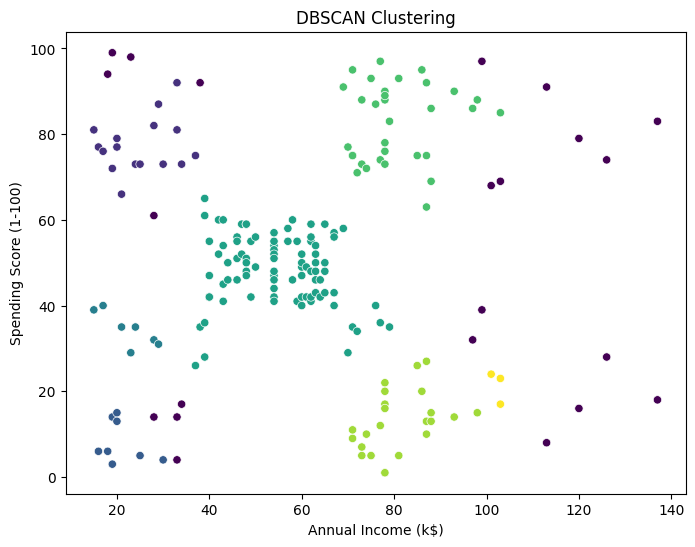

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=8, min_samples=4)
y_pred = dbscan.fit_predict(data_subset_5)

# visualize clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data_subset_5,c=y_pred)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()


In [5]:
DB_data=data.copy()
DB_data['Cluster']=y_pred
DB_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


In [8]:
DB_data['Cluster'].value_counts()

 3    89
 4    32
 5    23
-1    22
 0    16
 1     8
 2     7
 6     3
Name: Cluster, dtype: int64

**Hierarchical clustering**

We will apply Hierarchical clustering in this section on the same dataset of K-means.

In [7]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data_subset_5)



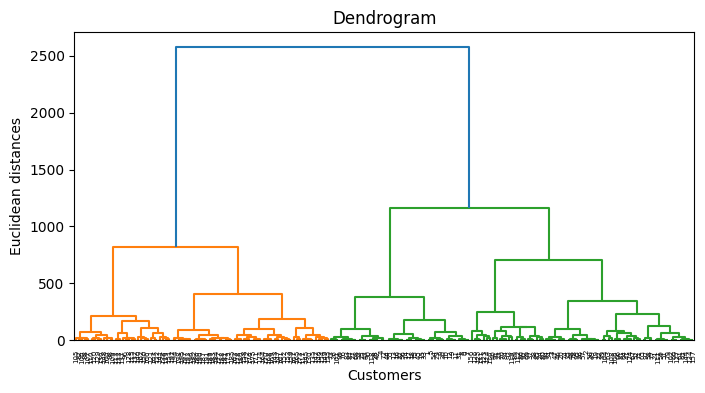

In [10]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(model.children_, 'ward')

plt.figure(figsize=(8,4))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


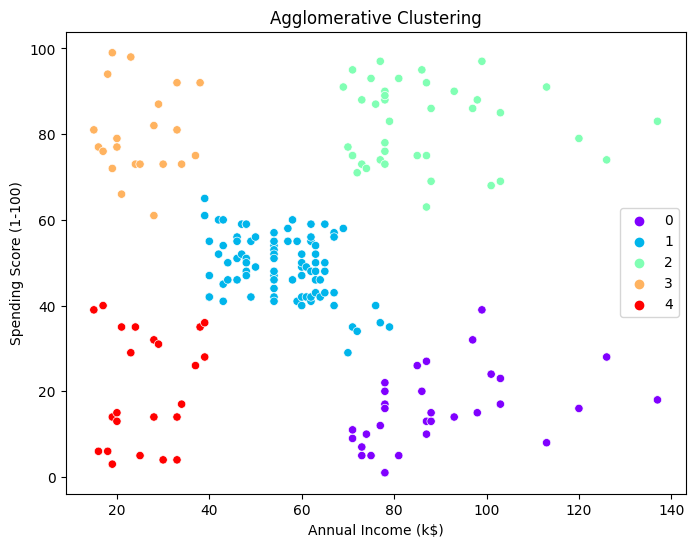

In [8]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# fit the data to the AgglomerativeClustering model
y_pred = model.fit_predict(data_subset_5)

# visualize the clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=data_subset_5, hue=y_pred, palette='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering')
plt.show();

In [9]:
HC_data=data.copy()
HC_data['Cluster']=y_pred
HC_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [10]:
HC_data['Cluster'].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: Cluster, dtype: int64

K-means seem to perform quite well, then agglomerative clustering. There are a group of customers that spend even with lowe income (cluster 3), some other spend less even with high income (cluster 0).

Overall, we think the customers spending habit are distributed across all quadrant, although a little titled to spend less. At the center, (cluster 1), we also see that average earning customers spend averagely.